In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
insurance_data = pd.read_csv('insurance.csv')

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Shape of the data

In [5]:
insurance_data.shape

(1338, 7)

### Datatype of each attribute

In [6]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking the presence of missing values

In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 5 point summary of numerical attributes

In [9]:
##5 point summary[Median, min, max, 1QR, 3QR] of numeriacal attributes are age,bmi,children,charges

In [10]:
insurance_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Text(0, 0.5, 'Value')

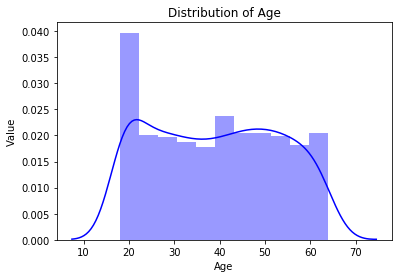

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.distplot(insurance_data['age'], color = 'blue')
# Add labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

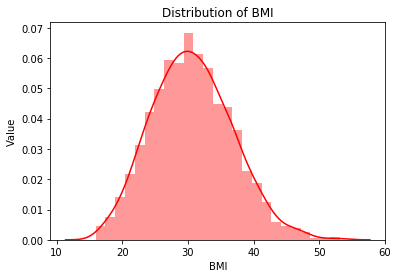

In [16]:
sns.distplot(insurance_data['bmi'], color = 'red')
# Add labels
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

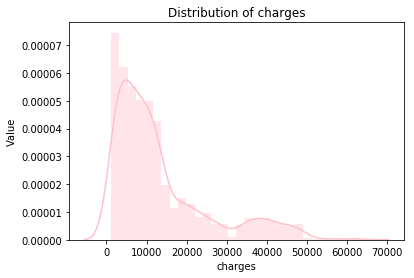

In [19]:
sns.distplot(insurance_data['charges'], color = 'pink')
# Add labels
plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Value')

### Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns

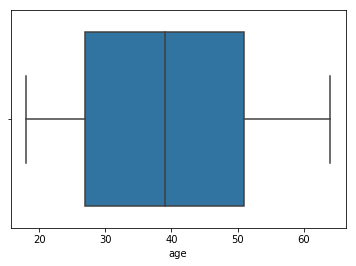

In [24]:
sns.boxplot(x=insurance_data['age'])

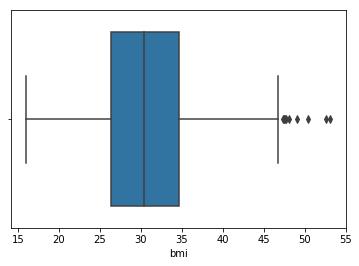

In [22]:
sns.boxplot(x=insurance_data['bmi'])

We can see few high outliers with BMI

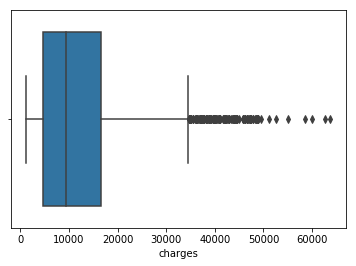

In [23]:
sns.boxplot(x=insurance_data['charges'])

We can see high outliers with charges more

### Distribution of categorical columns (include children)

### Pair plot that includes all the columns of the data frame

In [19]:
sns.pairplot(insurance_data,

TypeError: pairplot() got an unexpected keyword argument 'include'

## Do charges of people who smoke differ significantly from the people who don't?

In [27]:
print("Smoker     = ",insurance_data['charges'][insurance_data['smoker']=='yes'].describe())
print("Non-Smoker = ",insurance_data['charges'][insurance_data['smoker']=='no'].describe())

Smoker     =  count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
Non-Smoker =  count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


In [31]:
print("IQR for smokers =", 41019.207275-20826.244213)
print("IQR for non-smokers =", 11362.887050-3986.438700)

print("Mean charges for smokers =", 32050.231832)
print("Mean charges for non-smokers =",  8434.268298)

print("Std Deviation for smokers =", 11541.547176)
print("Std Deviation for non-smokers =", 5993.781819)

IQR for smokers = 20192.963062
IQR for non-smokers = 7376.448349999999
Mean charges for smokers = 32050.231832
Mean charges for non-smokers = 8434.268298
Std Deviation for smokers = 11541.547176
Std Deviation for non-smokers = 5993.781819


In [11]:
from scipy import stats
smoker_charges = np.array(insurance_data[insurance_data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
nonsmoker_charges = np.array(insurance_data[insurance_data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array
tstat,pvalue = stats.ttest_ind(smoker_charges,nonsmoker_charges, equal_var=False)
print(pvalue)
print(tstat)
if pvalue<0.05:
    print("reject null hypothesis:  charges for smokers than compared with Non-Smokers")
else:
    print("accept null hypothesis: So charges for smokers &  Non-Smokers almost same or equall")

5.88946444671698e-103
32.751887766341824
reject null hypothesis:  charges for smokers than compared with Non-Smokers


## Does bmi of males differ significantly from that of females?

In [1]:
print("BMI for females  = ",insurance_data['bmi'][insurance_data['sex']=='female'].describe())
print("*"*60)
print("BMI for males   = ",insurance_data['bmi'][insurance_data['sex']=='male'].describe())

NameError: name 'insurance_data' is not defined

In [13]:

male_bmi = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
female_bmi = np.array(insurance_data[insurance_data.sex == 'female'].bmi)
tstat,pvalue = stats.ttest_ind(male_bmi,female_bmi, equal_var=False)
print(pvalue)
print(tstat)
if pvalue<0.05:
    print("reject null hypothesis:  BMI is  different sex group ")
else:
    print("accept null hypothesis:  BMI is same for sex group ")

0.08992430667834876
1.697027933124022
accept null hypothesis:  BMI is same for sex group 


## Is the proportion of smokers significantly different in different genders?

In [16]:
crosstab = pd.crosstab(insurance_data['sex'],insurance_data['smoker']) 
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


## Is the distribution of bmi across women with no children, one child and two children, the same ?